# Visualización

Una de las herramientas más potentes que tenemos para mostrar las conclusiones a las que podemos llegar tras realizar un análisis de datos o tras aplicar ciertas transformaciones a nuestros datos brutos es su visualización mediante gráficos. En esta lección exploraremos las posibilidades que nos ofrece la base de **R** mediante la función `plot` y en segundo lugar seguiremos descubriendo las posibilidades que nos ofrece el entorno _tidyverse_ mediante la librería _ggplot2_. Esta librería implementa una gramática de gráficos, un sistema coherente para describir y construir gráficos.


## R base

El núcleo de **R** provee tres funciones básicas para dibujar gráficos que nos pueden servir para dibujar nuestros primeros gráficos. Los ejemplos usados en esta sección están extraídos del siguiente [enlace](https://bookdown.org/chescosalgado/intro_r/graficas.html#gr%C3%A1ficas-base)

### Plot

Es la función de dibujo más versátil de todas. En el libro [AprendeR](https://aprender-uib.github.io/AprendeR1/chap-plot.html) en concreto el capítulo 7 se dedica solamente a esta función. Es altamente recomendable leer este capítulo si se necesita/quiere realizar gráficos complejos con esta función. Nosotros simplemente describiremos su sintaxis más básica y veremos algunos ejemplos.

Con la función `plot`, podemos crear una amplia gama de gráficos, según los datos que esta reciba como parámetros. En la siguiente tabla resumimos todas las posibilidades disponibles para la función de trazado base **R**.

Esta función tiene un comportamiento especial, pues dependiendo del tipo de dato que le demos como argumento, generará diferentes tipos de gráfica. Además, para cada tipo de gráfico, podremos ajustar diferentes parámetros que controlan su aspecto, dentro de esta misma función.

Esta función tiene un argumento `x`, que corresponde al eje X de una gráfica. Este parámetro requiere un vector y si no especificamos este argumento, obtendremos un error. El resto de los argumentos de `plot` son opcionales puedes consultarlo con la expresión `?plot`, pero el más importante es `y` que corresponde al eje Y de nuestra gráfica.

Dependiendo del tipo de dato que pasemos como parámetros obtendremos diferentes tipos de gráficos de acuerdo a las siguientes reglas:

| Entrada                      | Salida                                                                           |
|------------------------------|----------------------------------------------------------------------------------|
| plot(x)                      | Diagrama de dispersión de vectores numéricos x                                   |
| plot(x,y)                    | Diagrama de dispersión de vectores numéricos x e y                               |
| plot(factor)                 | Diagrama de barras del factor                                                    |
| plot(factor, y)              | Diagrama de caja del vector numérico y los niveles del factor                    |
| plot(time_series)            | Gráfico de la serie temporal                                                     |
| plot(data_frame)             | Gráfica de correlación de todos columnas de marco de datos (más de dos columnas) |
| plot(function, lower, upper) | Gráfico de la función entre el valor lower y el valor upper especificado         |

A continuación veremos diferentes ejecuciones de esta función usando el ya conocido conjunto de datos de Iris.

In [2]:
data(iris)

Si solamente recibe un único vector, vemos que muestra cada valor respecto a su índice:

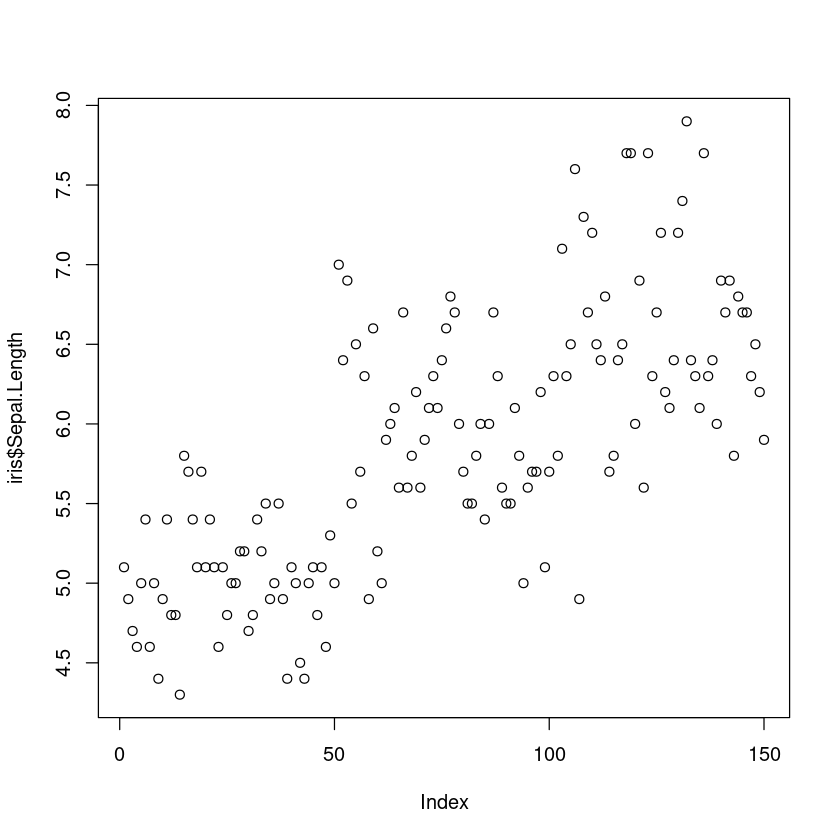

In [3]:
plot(iris$Sepal.Length)

Por otra parte, si recibe 2 vectores vemos el diagrama de dispersión. Por ejemplo podemos observar la relación entre las variables `Petal.Length` y `Petal.Width`. Esta función puede recibir multitud de parámetros diferentes, por ejemplo aquí vemos como poner un título:


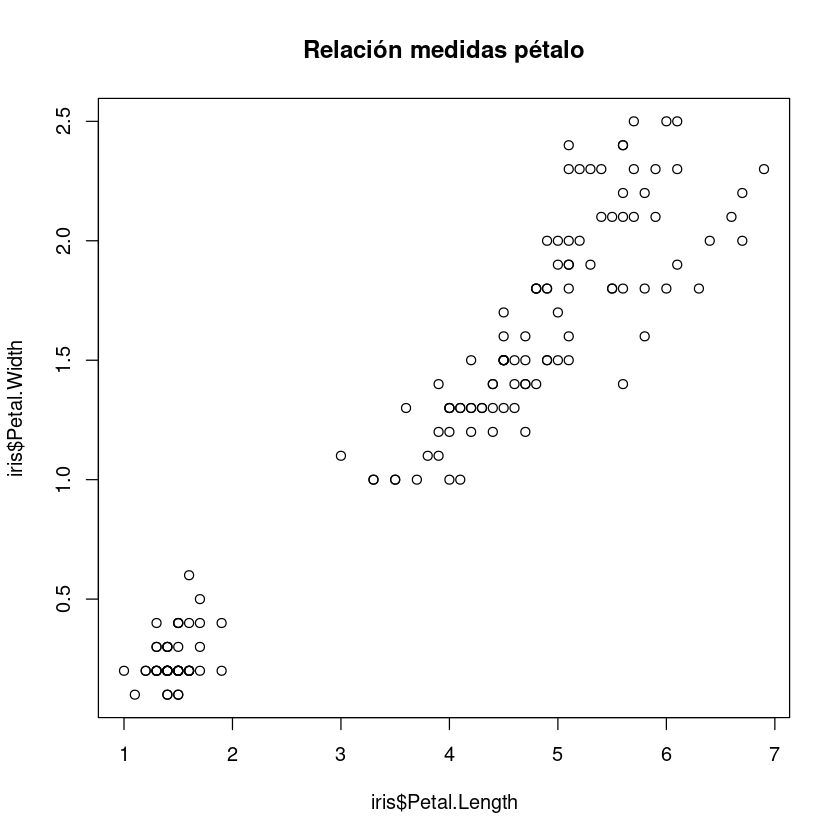

In [8]:
plot(iris$Petal.Length, iris$Petal.Width, main="Relación medidas pétalo")

Esta función también es útil con factores. A continuación veremos como nos muestra el número de ocurrencias de cada categoría:

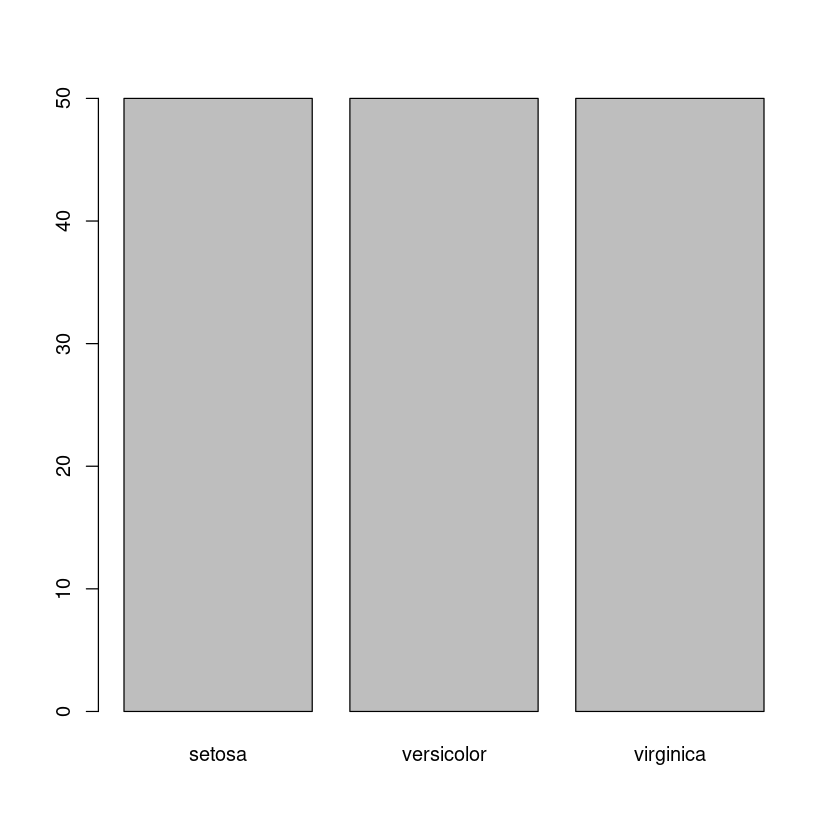

In [9]:
plot(iris$Species)

Por otra parte, la combinación de un factor y un vector nos proporciona un diagrama de cajas de cada uno de los valores de los factores. Este diagrama muestra el resumen de cinco números de un conjunto de datos. El resumen de cinco números es el valor mínimo, el primer cuartil (Q1), la mediana (Q2), el tercer cuartil (Q3) y el valor máximo.

En el ejemplo vemos el diagrama de cajas de la característica `Sepal.Lenght` según la variable `Species` como cambiamos las leyendas de los ejes con los parámetros: `xlab` y `ylab`:

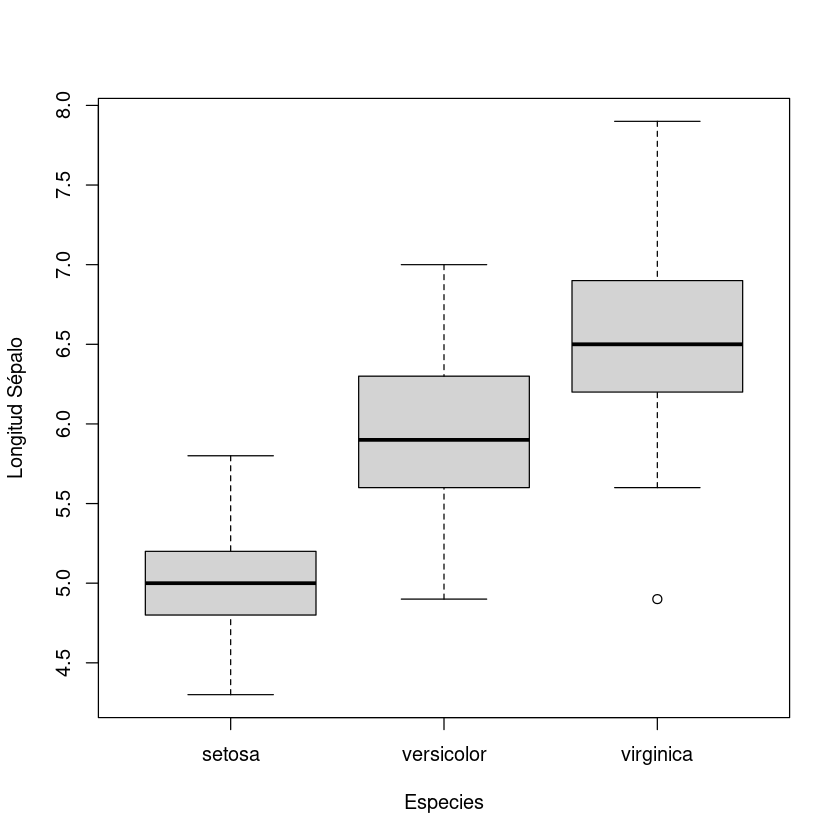

In [12]:
plot(iris$Species, iris$Sepal.Length, xlab="Especies", ylab="Longitud Sépalo")

Veamos que sucede cuando esta función recibe un _dataframe_:

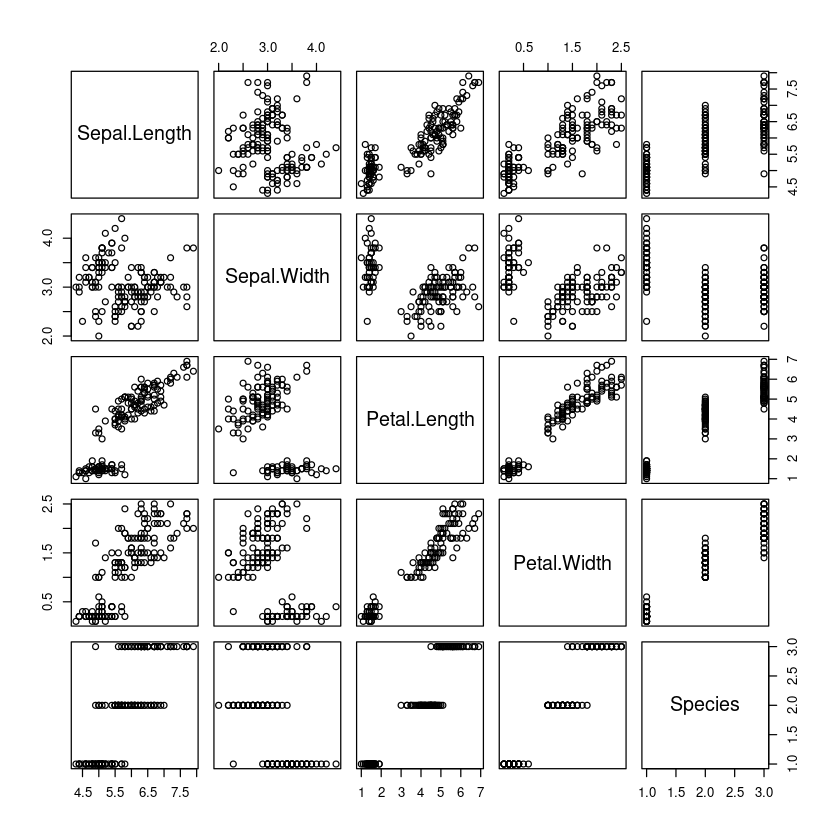

In [13]:
plot(iris)

### Hist

Con la función `hist` podemos dibujar un histograma. Un histograma es un gráfico que permite descubrir y mostrar la distribución de frecuencia de un conjunto de datos, además permite la inspección de valores atípicos, asimetría...

Veamos el histograma de la longitud del sépalo, en este caso añadimos un nuevo parámetro: `col`.

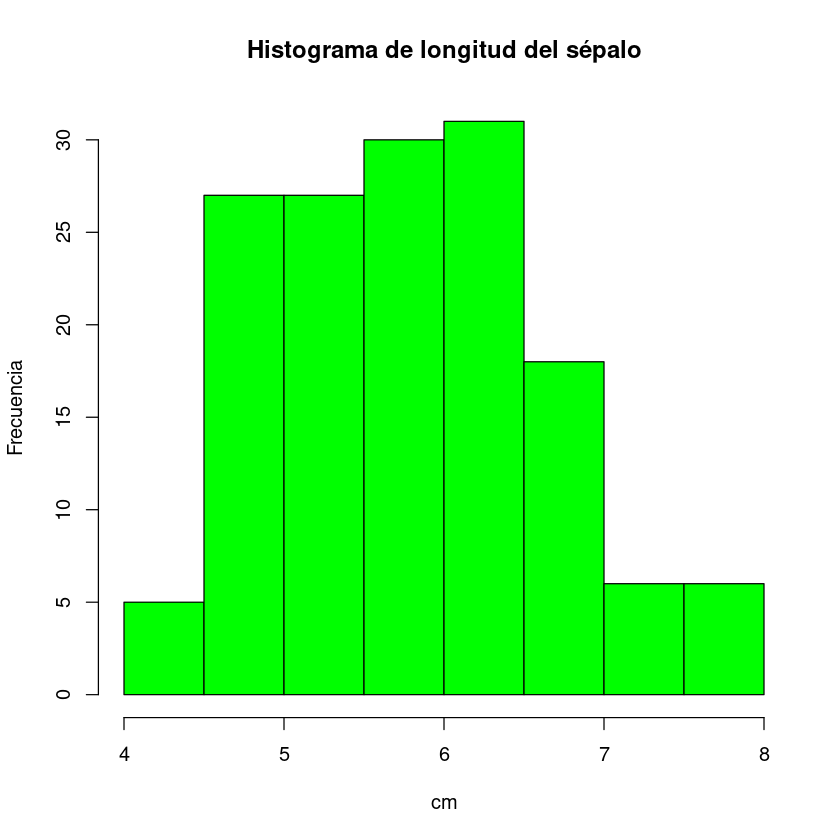

In [25]:
hist(iris$Sepal.Length, main="Histograma de longitud del sépalo",
     xlab="cm", ylab="Frecuencia", col="green")

Podemos personalizar los intervalos que queremos mostrar indicando el parámetro `breaks`:

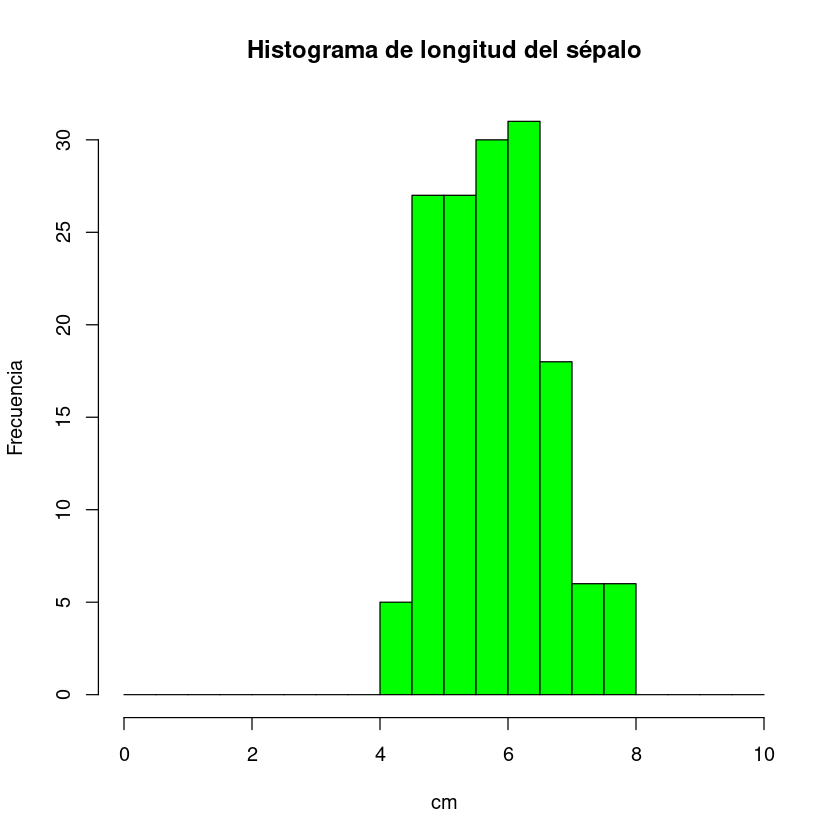

In [32]:
hist(iris$Sepal.Length, breaks=seq(0,10, 0.5),
main="Histograma de longitud del sépalo",
     xlab="cm", ylab="Frecuencia", col="green")

### Boxplot

La función `boxplot` realiza el diagrama de cajas, tanto de un vector como de un _dataframe_, los valores que muestra son los 5 mismos que con la función `plot` cuando recibía un factor y un vector. Veamos un sencillo ejemplo en el que aprovechamos para ilustrar  como asignar un color a cada sub diagrama:



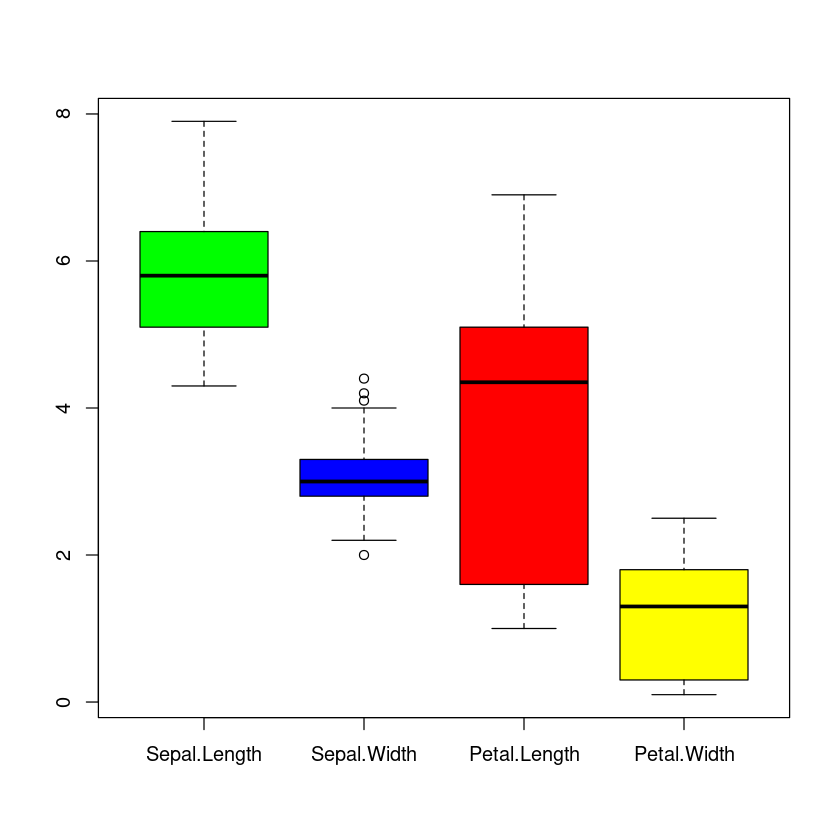

In [37]:
boxplot(iris[1:4], col=c("green", "blue", "red", "yellow"))

## ggplot2




In [ ]:
# install.packages("ggplot2")
library(ggplot2)